<a href="https://colab.research.google.com/github/rbdus0715/Machine-Learning/blob/main/competitions/kaggle/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[데이터](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)</br>
사용 알고리즘 : isolation forest
아래의 구현은 아래의 사항을 무시하고 구현한 것이다.
- 현재 길이가 높이 제한에 도달하면 평균 깊이를 더해야 한다.
- path length는 트리 간에 정규화되지 않았다. => 정규화하지 않은 실제 값이 사용되었다.
- 논문 저자는 무작위 선택보다 특징을 개선하기 위해 kurtosis 를 사용하여 특징을 선택할 것을 제안함

In [10]:
import pandas as pd
import numpy as np
import math
import random
%matplotlib inline
import random
from matplotlib import pyplot
import os

In [ ]:
!unzip -qq /content/drive/MyDrive/datasets/kaggle.isolation_forest.data/archive.zip

In [12]:
class ExNode:
    def __init__(self, size):
        self.size=size

class InNode:
    def __init__(self, left, right, splitAtt, splitVal):
        self.left=left
        self.right=right
        self.splitAtt=splitAtt
        self.splitVal=splitVal

In [13]:
# X : 100000개의 데이터 중 sample_size만큼 샘플링한 데이터
# currHeight : 0
# hlim : 최대 높이로 밑 2의 log(N)
def iTree(X, currHeight, hlim):
    if currHeight >= hlim or len(X) <= 1:
        return ExNode(len(X))
    else:
        Q = X.columns
        q = random.choice(Q)
        p = random.choice(X[q].unique())
        X_l = X[X[q] < p]
        X_r = X[X[q] >= p]
        return InNode(iTree(X_l, currHeight+1, hlim), iTree(X_r, currHeight+1, hlim), q, p)

In [14]:
# 원본 데이터에서 정상치인 것만 가져온 것의 100000개 샘플링한 데이터를 사용
# 트리의 개수는 10개
# sample_size는 10000개
def iForest(X, noOfTrees, sampleSize):
    forest = []
    hlim = math.ceil(math.log(sampleSize, 2))
    for i in range(noOfTrees):
        X_train = X.sample(sampleSize)
        forest.append(iTree(X_train, 0, hlim))
    return forest

In [15]:
def pathLength(x,Tree,currHeight):
    if isinstance(Tree,ExNode):
        return currHeight
    a=Tree.splitAtt
    if x[a]<Tree.splitVal:
        return pathLength(x,Tree.left,currHeight+1)
    else:
        return pathLength(x,Tree.right,currHeight+1)

In [18]:
df=pd.read_csv("creditcard.csv")
y_true=df['Class']
df_data=df.drop('Class',1)
df_data

<ipython-input-18-7275f42d78d3>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_data=df.drop('Class',1)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [19]:
sampleSize =  10000
ifor = iForest(df_data.sample(100000), 10, sampleSize)

In [20]:
posLenLst = []
negLenLst = []

for sim in range(1000):
    ind = random.choice(df_data[y_true==1].index)
    for tree in ifor:
        posLenLst.append(pathLength(df_data.iloc[ind], tree, 0))

    ind = random.choice(df_data[y_true==0].index)
    for tree in ifor:
        negLenLst.append(pathLength(df_data.iloc[ind], tree, 0))

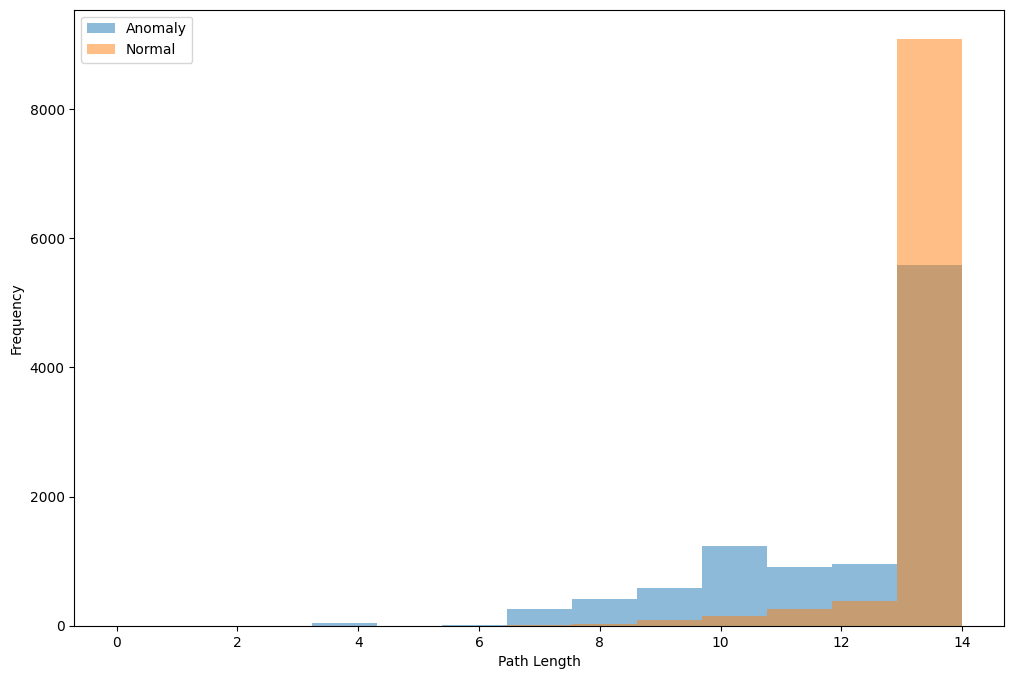

In [21]:
bins = np.linspace(0,math.ceil(math.log(sampleSize,2)), math.ceil(math.log(sampleSize,2)))

pyplot.figure(figsize=(12,8))
pyplot.hist(posLenLst, bins, alpha=0.5, label='Anomaly')
pyplot.hist(negLenLst, bins, alpha=0.5, label='Normal')
pyplot.xlabel('Path Length')
pyplot.ylabel('Frequency')
pyplot.legend(loc='upper left')

T-SNE를 사용해 2d로 차원을 축소하였다. 아래의 플롯을 확인해보면 양성 샘플이 정상 샘플과 멀리 떨어져있지 않음을 확인할 수 있는데 이는 거리 기반의 이상치 탐지가 이 태스크에서 잘 작동하지 않을것임을 예측할 수 있게 한다.

In [36]:
from sklearn.manifold import TSNE

df_plt=df[df['Class']==0].sample(1000)
df_plt_pos=df[df['Class']==1].sample(20)
df_plt=pd.concat([df_plt,df_plt_pos])
y_plt=df_plt['Class']
X_plt=df_plt.drop('Class',1)

<ipython-input-36-9599e6804eab>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_plt=df_plt.drop('Class',1)


In [37]:
X_embedded = TSNE(n_components=2).fit_transform(X_plt)

<ipython-input-38-639996d80a37>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  pyplot.scatter(X_embedded[:,0], X_embedded[:,1], c=y_plt, cmap=pyplot.cm.get_cmap("Paired", 2))


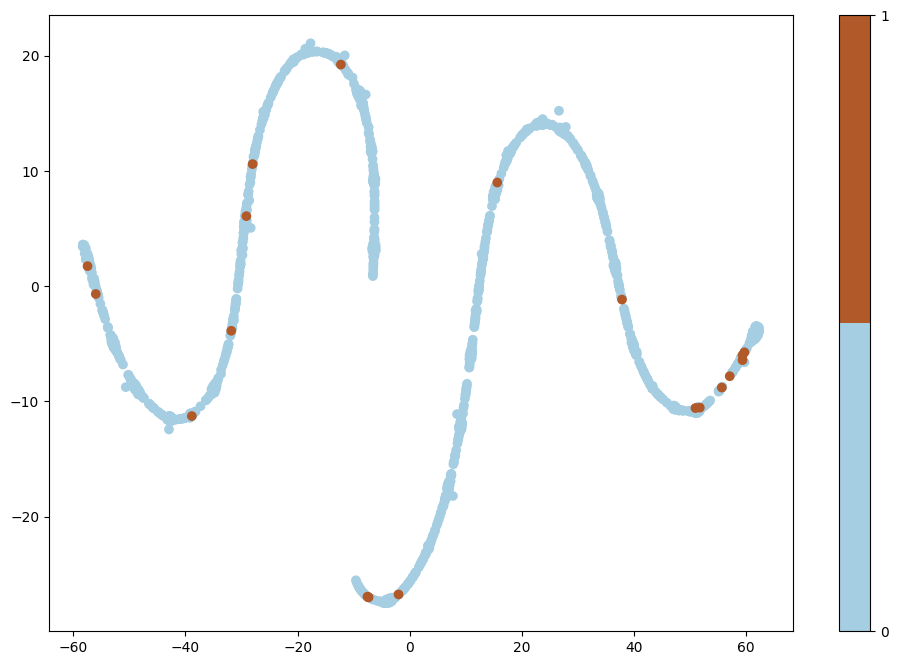

In [38]:
pyplot.figure(figsize=(12,8))
pyplot.scatter(X_embedded[:,0], X_embedded[:,1], c=y_plt, cmap=pyplot.cm.get_cmap("Paired", 2))
pyplot.colorbar(ticks=range(2))